In [118]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import zscore
from utils.dataframe_cleaning import *

In [119]:
final_dataset_path = '../dataset/final/'
acc_dataset_path = final_dataset_path + 'PatchTable_Acceleration.csv'
gyro_dataset_path = final_dataset_path + 'PatchTable_Gyroscope.csv'

|# 1. Data Preprocessing
This first section focuses on visualising the data and using preprocessing techniques to clean the data. The features are also scaled using Z-score normalisation.

### Null Values Counts

In [120]:
acc_dataset_df = pd.read_csv(acc_dataset_path)
gyro_dataset_df = pd.read_csv(gyro_dataset_path)

In [121]:
acc_dataset_df.head()

,Subject,Class,ClassificationType,DominantFreq_VT,DominantFreq_ML,DominantFreq_AP,DominantFreq_Magnitude,CorssCorrelationSum_VTML,CorssCorrelationSum_VTAP,CorssCorrelationSum_MLAP,...,MeanFreq_Plom_Magnitude,MedianFreq_Plom_Magnitude,SumPSD_Plom_Magnitude,Moment2ndPSD_Plom_Magnitude,Moment3rdPSD_Plom_Magnitude,SkewnessPSD_Plom_Magnitude,KurtosisPSD_Plom_Magnitude,ZeroCrossingRate_Magnitude,ModeSignal_Magnitude,EnergySignal_Magnitude
0,1,0,NonTremor,1.275879,1.313965,1.491699,2.735840,7.638869e+11,1.591759e+12,6.360880e+11,...,52.001128,52.001128,3.469357e+05,1338.155255,3.872119e+05,7.910226,86.394119,0.051150,-373.113700,1.804045e+07
1,1,1,Tremor,1.199707,2.694580,1.199707,2.843750,4.022753e+12,2.876949e+13,2.766688e+12,...,52.000473,52.000473,1.836511e+06,6701.687263,4.586586e+06,8.360136,98.216593,0.058036,-487.610313,9.549848e+07
2,2,0,NonTremor,1.440918,1.282227,3.948242,4.018066,2.766775e+11,2.064465e+11,1.034505e+11,...,52.001338,52.001338,5.331851e+05,4745.589779,2.783827e+06,8.515438,103.171086,0.051686,-490.892519,2.772484e+07
3,2,1,Tremor,4.544922,1.571045,1.697998,2.177246,3.170867e+12,3.487681e+12,7.671768e+11,...,52.000699,52.000699,1.063410e+06,4463.722035,2.222014e+06,7.450768,76.927070,0.052473,-549.906618,5.529404e+07
4,3,0,NonTremor,1.358398,2.919922,1.561523,1.682129,6.446938e+10,1.437796e+11,9.122035e+10,...,52.001557,52.001557,1.040546e+06,21891.543500,2.431232e+07,7.506058,77.624907,0.055808,-700.136102,5.410814e+07


In [122]:
gyro_dataset_df.head()

,Subject,Class,ClassificationType,DominantFreq_VT,DominantFreq_ML,DominantFreq_AP,DominantFreq_Magnitude,CorssCorrelationSum_VTML,CorssCorrelationSum_VTAP,CorssCorrelationSum_MLAP,...,MeanFreq_Plom_Magnitude,MedianFreq_Plom_Magnitude,SumPSD_Plom_Magnitude,Moment2ndPSD_Plom_Magnitude,Moment3rdPSD_Plom_Magnitude,SkewnessPSD_Plom_Magnitude,KurtosisPSD_Plom_Magnitude,ZeroCrossingRate_Magnitude,ModeSignal_Magnitude,EnergySignal_Magnitude
0,1,0,NonTremor,4.576660,1.434570,2.958008,1.244141,1.176294e+13,1.115135e+13,8.209587e+12,...,52.001128,52.001128,3.803190e+08,6.796928e+09,1.904421e+16,33.985529,1787.733210,0.026768,-1666.787678,1.975588e+10
1,1,1,Tremor,4.373535,3.887939,1.313965,1.742432,3.921316e+13,3.349503e+13,2.753261e+13,...,52.000473,52.000473,7.612384e+08,5.215802e+09,1.560861e+16,41.436468,2864.293954,0.028818,-2003.013256,3.957534e+10
2,2,0,NonTremor,1.428223,4.557617,2.691406,1.682129,1.045489e+13,9.736465e+12,1.017394e+13,...,52.001338,52.001338,2.729143e+08,2.806287e+09,3.221413e+15,21.669472,763.047058,0.035418,-2056.468205,1.418196e+10
3,2,1,Tremor,5.322510,1.380615,3.126221,2.078857,2.761945e+13,2.289461e+13,2.311832e+13,...,52.000699,52.000699,4.531191e+08,4.281571e+09,1.309074e+16,46.726079,3154.580659,0.035323,-1941.587963,2.354420e+10
4,3,0,NonTremor,5.896973,2.951660,1.409180,1.129883,6.820704e+12,9.794528e+12,6.945322e+12,...,52.001557,52.001557,3.062345e+08,4.720087e+09,5.116963e+15,15.779282,352.859747,0.026886,-1760.840236,1.592041e+10


In [123]:
null_counts_acc = get_null_count_columns(acc_dataset_df.iloc[:, 3:])
null_counts_gyro = get_null_count_columns(gyro_dataset_df.iloc[:, 3:])

acc_null_df = pd.DataFrame(data=null_counts_acc, index=['Null Counts Acceleration'])
gyro_null_df = pd.DataFrame(data=null_counts_gyro, index=['Null Counts Gyroscope'])

#### Acceleration Data Null Values

In [124]:
print("Number of features with at least one Null value: " + str(len(acc_null_df.columns)))
acc_null_df

Number of features with at least one Null value: 12


,Width_VT,Width_ML,Width_AP,Slope_VT,Slope_ML,Slope_AP,WidthNorm_VT,WidthNorm_ML,WidthNorm_AP,SlopeNorm_VT,SlopeNorm_ML,SlopeNorm_AP
Null Counts Acceleration,3,2,2,3,2,2,3,2,2,3,2,2


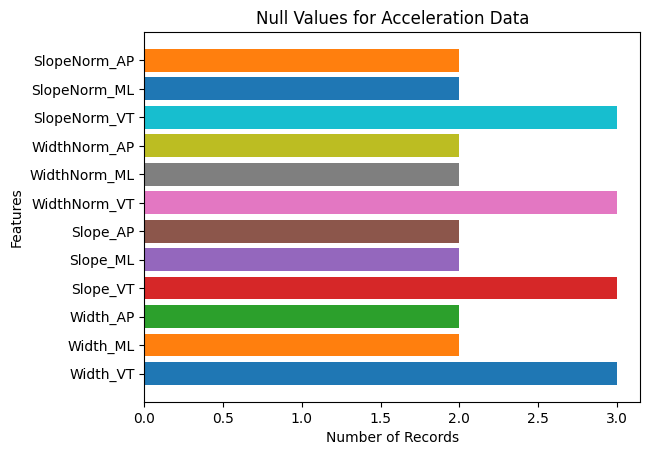

In [125]:
# Plots null counts on bar graph for Acceleration Data
for column in acc_null_df.columns:
    plt.barh(column, acc_null_df[column].iloc[0], label=column)

plt.title('Null Values for Acceleration Data')
plt.xlabel('Number of Records')
plt.ylabel('Features')
plt.show()

#### Gyroscope Data Null Values

In [126]:
print("Number of features with at least one Null value: " + str(len(gyro_null_df.columns)))
gyro_null_df

Number of features with at least one Null value: 8


,Width_VT,Width_AP,Slope_VT,Slope_AP,WidthNorm_VT,WidthNorm_AP,SlopeNorm_VT,SlopeNorm_AP
Null Counts Gyroscope,1,2,1,2,1,2,1,2


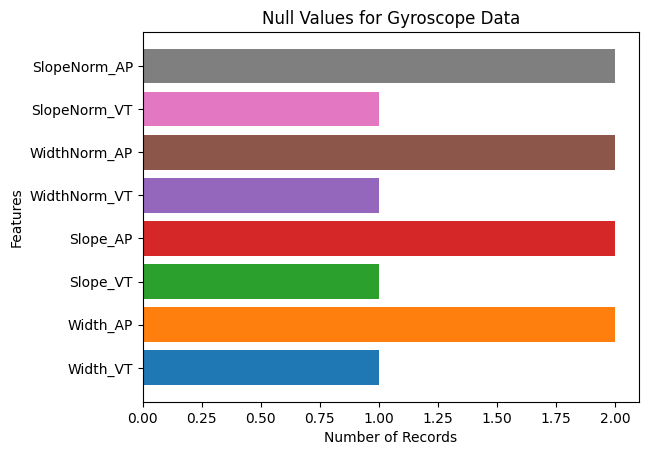

In [127]:
# Plots null counts on bar graph for Acceleration Data
for column in gyro_null_df.columns:
    plt.barh(column, gyro_null_df[column].iloc[0], label=column)

plt.title('Null Values for Gyroscope Data')
plt.xlabel('Number of Records')
plt.ylabel('Features')
plt.show()

#### Removal of Null Value Features

In [128]:
acc_cols_to_drop = acc_null_df.columns.tolist()
gyro_cols_to_drop = gyro_null_df.columns.tolist()

acc_dataset_df = acc_dataset_df.drop(acc_cols_to_drop, axis=1)
gyro_dataset_df = gyro_dataset_df.drop(gyro_cols_to_drop, axis=1)

In [129]:
acc_dataset_df

,Subject,Class,ClassificationType,DominantFreq_VT,DominantFreq_ML,DominantFreq_AP,DominantFreq_Magnitude,CorssCorrelationSum_VTML,CorssCorrelationSum_VTAP,CorssCorrelationSum_MLAP,...,MeanFreq_Plom_Magnitude,MedianFreq_Plom_Magnitude,SumPSD_Plom_Magnitude,Moment2ndPSD_Plom_Magnitude,Moment3rdPSD_Plom_Magnitude,SkewnessPSD_Plom_Magnitude,KurtosisPSD_Plom_Magnitude,ZeroCrossingRate_Magnitude,ModeSignal_Magnitude,EnergySignal_Magnitude
0,1,0,NonTremor,1.275879,1.313965,1.491699,2.735840,7.638869e+11,1.591759e+12,6.360880e+11,...,52.001128,52.001128,3.469357e+05,1338.155255,3.872119e+05,7.910226,86.394119,0.051150,-373.113700,1.804045e+07
1,1,1,Tremor,1.199707,2.694580,1.199707,2.843750,4.022753e+12,2.876949e+13,2.766688e+12,...,52.000473,52.000473,1.836511e+06,6701.687263,4.586586e+06,8.360136,98.216593,0.058036,-487.610313,9.549848e+07
2,2,0,NonTremor,1.440918,1.282227,3.948242,4.018066,2.766775e+11,2.064465e+11,1.034505e+11,...,52.001338,52.001338,5.331851e+05,4745.589779,2.783827e+06,8.515438,103.171086,0.051686,-490.892519,2.772484e+07
3,2,1,Tremor,4.544922,1.571045,1.697998,2.177246,3.170867e+12,3.487681e+12,7.671768e+11,...,52.000699,52.000699,1.063410e+06,4463.722035,2.222014e+06,7.450768,76.927070,0.052473,-549.906618,5.529404e+07
4,3,0,NonTremor,1.358398,2.919922,1.561523,1.682129,6.446938e+10,1.437796e+11,9.122035e+10,...,52.001557,52.001557,1.040546e+06,21891.543500,2.431232e+07,7.506058,77.624907,0.055808,-700.136102,5.410814e+07
5,3,1,Tremor,0.875977,1.320312,1.371094,6.766602,3.422075e+11,1.100315e+12,1.990047e+12,...,52.001268,52.001268,1.520383e+06,32997.516987,4.777565e+07,7.970485,88.101119,0.054878,-531.261456,7.905971e+07
6,4,0,NonTremor,2.564453,0.761719,2.818359,2.818359,6.781065e+10,3.188211e+10,7.241926e+10,...,52.004351,52.004351,5.789691e+05,54615.041708,9.303344e+07,7.289046,68.245900,0.056904,-672.179400,3.010550e+07
7,4,1,Tremor,1.155273,1.180664,1.396484,1.371094,1.423778e+11,8.226579e+11,1.291804e+11,...,52.003095,52.003095,2.509727e+05,5181.123890,2.999130e+06,8.041912,87.356018,0.062381,-215.438376,1.305037e+07
8,5,0,NonTremor,2.151855,1.320312,1.263184,2.742188,2.105476e+11,1.828429e+11,1.435666e+11,...,52.001581,52.001581,6.227324e+05,9651.171763,8.294133e+06,8.747842,102.478482,0.051429,-405.680035,3.238178e+07
9,5,1,Tremor,1.840820,0.590332,1.377441,1.967773,6.961031e+11,6.074581e+11,3.177283e+11,...,52.001250,52.001250,1.955121e+05,474.845276,8.677838e+04,8.386550,106.965911,0.061202,-298.240012,1.016569e+07


### Normalisation
Using z value feature normalisation/standardisation

In [130]:
acc_z_scores = zscore(acc_dataset_df.iloc[:, 3:].astype(float))
gyro_z_scores = zscore(gyro_dataset_df.iloc[:, 3:].astype(float))

# Create a new DataFrame with Z-scores
norm_acc_df = pd.DataFrame(acc_z_scores, columns=acc_dataset_df.columns[3:])
norm_gyro_df = pd.DataFrame(gyro_z_scores, columns=gyro_dataset_df.columns[3:])

norm_acc_df = pd.concat([acc_dataset_df.iloc[:, :3], norm_acc_df], axis=1)
norm_gyro_df = pd.concat([gyro_dataset_df.iloc[:, :3], norm_gyro_df], axis=1)

In [131]:
norm_acc_null_count = get_null_count_columns(norm_acc_df.iloc[:, 3:])
norm_gyro_null_count = get_null_count_columns(norm_gyro_df.iloc[:, 3:])

In [132]:
norm_acc_df = norm_acc_df.drop(columns=list(norm_acc_null_count.keys()))
norm_gyro_df = norm_gyro_df.drop(columns=list(norm_gyro_null_count.keys()))

In [133]:
norm_acc_df

,Subject,Class,ClassificationType,DominantFreq_VT,DominantFreq_ML,DominantFreq_AP,DominantFreq_Magnitude,CorssCorrelationSum_VTML,CorssCorrelationSum_VTAP,CorssCorrelationSum_MLAP,...,MeanFreq_Plom_Magnitude,MedianFreq_Plom_Magnitude,SumPSD_Plom_Magnitude,Moment2ndPSD_Plom_Magnitude,Moment3rdPSD_Plom_Magnitude,SkewnessPSD_Plom_Magnitude,KurtosisPSD_Plom_Magnitude,ZeroCrossingRate_Magnitude,ModeSignal_Magnitude,EnergySignal_Magnitude
0,1,0,NonTremor,-0.565279,-0.183289,-0.349227,-0.038319,-0.339676,-0.226463,-0.190883,...,-0.492091,-0.492091,-1.027345,-0.905046,-0.751573,-0.073080,-0.083144,-0.737538,0.657242,-1.027326
1,1,1,Tremor,-0.642362,1.896645,-0.727585,0.039852,1.518135,3.290363,2.295714,...,-1.133617,-1.133617,1.839771,-0.590126,-0.608156,0.913162,0.887799,0.634839,-0.187022,1.839808
2,2,0,NonTremor,-0.398265,-0.231104,2.833913,0.890543,-0.617424,-0.405724,-0.812518,...,-0.286002,-0.286002,-0.668854,-0.704978,-0.669724,1.253597,1.294697,-0.630665,-0.211224,-0.668855
3,2,1,Tremor,2.742887,0.204009,-0.081909,-0.442972,1.032493,0.018871,-0.037891,...,-0.912159,-0.912159,0.351717,-0.721528,-0.688911,-1.080254,-0.860644,-0.473802,-0.646376,0.351628
4,3,0,NonTremor,-0.481772,2.236128,-0.258750,-0.801642,-0.738400,-0.413833,-0.826791,...,-0.072173,-0.072173,0.307707,0.301750,0.065519,-0.959054,-0.803333,0.190848,-1.754123,0.307731
5,3,1,Tremor,-0.969967,-0.173726,-0.505505,2.881618,-0.580067,-0.290057,1.389306,...,-0.354720,-0.354720,1.231292,0.953839,0.866840,0.059012,0.057047,0.005452,-0.508892,1.231322
6,4,0,NonTremor,0.738717,-1.015263,1.369833,0.021459,-0.736495,-0.428313,-0.848734,...,2.663853,2.663853,-0.580730,2.223116,2.412486,-1.434764,-1.573602,0.409136,-1.547979,-0.580734
7,4,1,Tremor,-0.687328,-0.384110,-0.472604,-1.026960,-0.693986,-0.325986,-0.782489,...,1.433947,1.433947,-1.212053,-0.679406,-0.662371,0.215588,-0.004146,1.500628,1.819892,-1.212035
8,5,0,NonTremor,0.321181,-0.173726,-0.645333,-0.033721,-0.655124,-0.408778,-0.765699,...,-0.049008,-0.049008,-0.496495,-0.416946,-0.481536,1.763047,1.237815,-0.681959,0.417107,-0.496477
9,5,1,Tremor,0.006424,-1.273462,-0.497280,-0.594717,-0.378319,-0.353833,-0.562437,...,-0.372630,-0.372630,-1.318803,-0.955736,-0.761834,0.971064,1.606354,1.265671,1.209338,-1.318813


In [134]:
norm_gyro_df

,Subject,Class,ClassificationType,DominantFreq_VT,DominantFreq_ML,DominantFreq_AP,DominantFreq_Magnitude,CorssCorrelationSum_VTML,CorssCorrelationSum_VTAP,CorssCorrelationSum_MLAP,...,MeanFreq_Plom_Magnitude,MedianFreq_Plom_Magnitude,SumPSD_Plom_Magnitude,Moment2ndPSD_Plom_Magnitude,Moment3rdPSD_Plom_Magnitude,SkewnessPSD_Plom_Magnitude,KurtosisPSD_Plom_Magnitude,ZeroCrossingRate_Magnitude,ModeSignal_Magnitude,EnergySignal_Magnitude
0,1,0,NonTremor,0.727909,-0.996089,0.419431,-0.486654,0.040499,0.015641,-0.179193,...,-0.492091,-0.492091,0.243521,-0.102638,-0.152766,0.437056,0.407550,-0.201971,1.140569,0.242431
1,1,1,Tremor,0.605287,0.932871,-1.231731,1.036364,2.636125,2.650822,2.380678,...,-1.133617,-1.133617,2.586322,-0.437060,-0.250719,1.170404,1.550426,0.284359,-0.176969,2.587382
2,2,0,NonTremor,-1.172733,1.459405,0.151675,0.852049,-0.083187,-0.151229,0.081040,...,-0.286002,-0.286002,-0.417060,-0.946692,-0.603891,-0.775134,-0.680256,1.849907,-0.386439,-0.417051
3,2,1,Tremor,1.178162,-1.038511,0.588373,2.064644,1.539852,1.400624,1.795883,...,-0.912159,-0.912159,0.691269,-0.634657,-0.322506,1.691026,1.858594,1.827208,0.063733,0.690648
4,3,0,NonTremor,1.524952,0.196722,-1.136104,-0.835882,-0.426827,-0.144381,-0.346680,...,-0.072173,-0.072173,-0.212128,-0.541907,-0.549846,-1.354867,-1.115711,-0.173902,0.772013,-0.211365
5,3,1,Tremor,0.800716,-0.207536,-0.141581,-0.835882,-0.091859,-0.024814,-0.027030,...,-0.354720,-0.354720,0.437454,0.598980,0.221992,0.206712,0.138509,-0.522966,-0.065989,0.438229
6,4,0,NonTremor,-1.007960,-0.786473,1.248200,-0.409048,-0.920990,-1.075703,-1.110358,...,2.663853,2.663853,-1.449924,-0.556076,-0.542153,-1.237536,-1.077491,-0.080420,-2.156054,-1.449896
7,4,1,Tremor,-1.046279,1.110046,-1.059602,0.561027,-0.871362,-1.004961,-1.023970,...,1.433947,1.433947,-1.250069,0.450521,0.045326,-0.106347,-0.464732,-0.564841,-0.943992,-1.249586
8,5,0,NonTremor,-0.870010,1.439442,-1.225356,-0.971692,-0.536956,-0.464523,-0.497764,...,-0.049008,-0.049008,-0.153544,0.361384,-0.142589,-0.668016,-0.751083,-1.648707,0.527311,-0.153453
9,5,1,Tremor,-0.682245,-1.175759,0.699938,-1.631343,-0.517936,-0.605482,-0.489775,...,-0.372630,-0.372630,-0.431019,-0.673572,-0.545759,-0.934038,-0.961453,-1.225724,1.828185,-0.430109


#### Saving to CSV

In [135]:
norm_acc_df.to_csv(final_dataset_path + 'PatchTable_Acceleration_Normalised.csv', index=False)
norm_gyro_df.to_csv(final_dataset_path + 'PatchTable_Gyroscope_Normalised.csv', index=False)